# 1. data pre-processing

In [2]:
import pandas as pd

celltype_maker = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker.csv', index_col=0).melt(var_name='type', value_name='name')
celltype_score = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker_score.csv', index_col=0).melt(var_name='type', value_name='score')

In [3]:
celltype_maker['type'] = [i.split('.', 1)[1] for i in celltype_maker['type']]
celltype_score['type'] = [i.split('.', 1)[1] for i in celltype_score['type']]

In [4]:
merged_data = celltype_maker.merge(celltype_score, on='type')

In [5]:
filtered_merged_data = merged_data[merged_data['score'] > 0.5]

In [6]:
filtered_merged_data

,type,name,score
0,adult.midgut.progenitors,sna,0.597076
1,adult.midgut.progenitors,sna,0.596462
200,adult.midgut.progenitors,hdc,0.597076
201,adult.midgut.progenitors,hdc,0.596462
400,adult.midgut.progenitors,esg,0.597076
...,...,...,...
919401,midgut.primordium,l(1)G0045,0.515247
919600,midgut.primordium,Tis11,0.574209
919601,midgut.primordium,Tis11,0.515247
919800,midgut.primordium,CG18273,0.574209


In [7]:
genes_list = filtered_merged_data['name'].tolist()

# 2. data visualization

In [8]:
import gseapy as gp
import matplotlib.pyplot as plt

gp.get_library_name(organism="fly")

['Allele_LoF_Phenotypes_from_FlyBase_2017',
 'Allele_Phenotypes_from_FlyBase_2017',
 'Anatomy_AutoRIF',
 'Anatomy_AutoRIF_Predicted_zscore',
 'Anatomy_GeneRIF',
 'Anatomy_GeneRIF_Predicted_zscore',
 'Coexpression_Predicted_GO_Biological_Process_2018',
 'Coexpression_Predicted_GO_Cellular_Component_2018',
 'Coexpression_Predicted_GO_Molecular_Function_2018',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_GeneRIF',
 'GO_Biological_Process_GeneRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_GeneRIF',
 'GO_Cellular_Component_GeneRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF',
 'GO_Molecular_Function_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_GeneRIF',
 'GO_Molecular_Function_GeneRIF_Predicted_zscore',
 'Human_Disease_from_FlyBase_2017',
 

In [9]:
def go_analysis(gene_list, gene_library, outdir, organism='fly'):
    enr_res = gp.enrichr(gene_list=gene_list,
                         gene_sets=gene_library,
                         organism=organism,
                         outdir= outdir)
    
    enr_res.res2d.Term = enr_res.res2d.Term.str.split("\(GO").str[0]

    gp.dotplot(enr_res.res2d,
           figsize=(3,5),
           title=gene_library,
           cmap= plt.cm.autumn_r,
           cutoff=0.05)

In [10]:
# biological process
enr_res = gp.enrichr(gene_list= genes_list,
                     gene_sets='GO_Biological_Process_2018',
                     organism='fly',
                     outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')

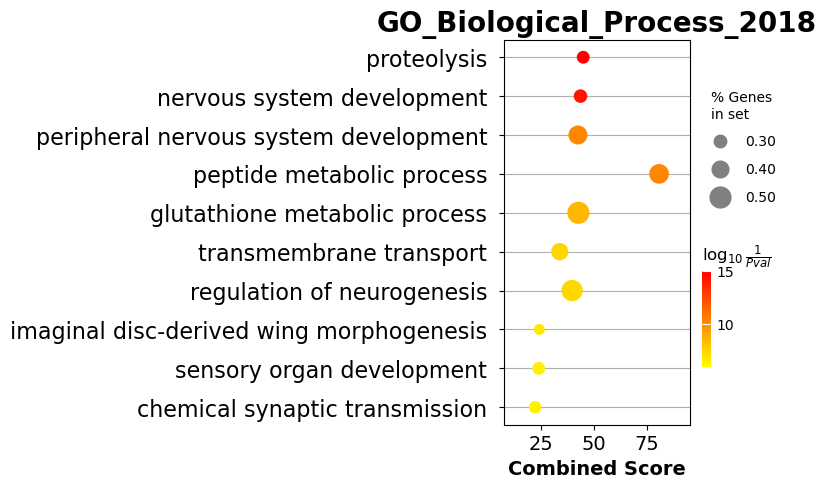

In [11]:
go_analysis(genes_list, 'GO_Biological_Process_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')

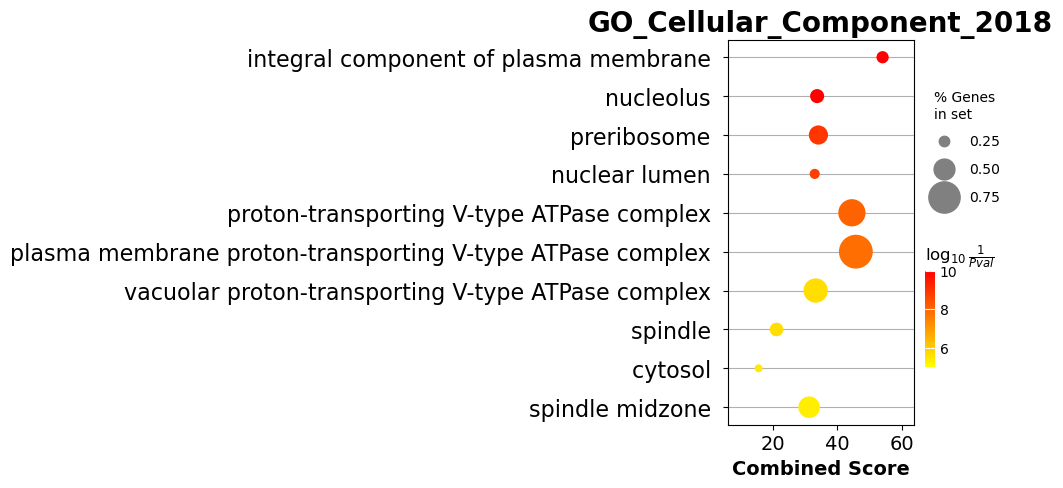

In [12]:
go_analysis(genes_list, 'GO_Cellular_Component_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')

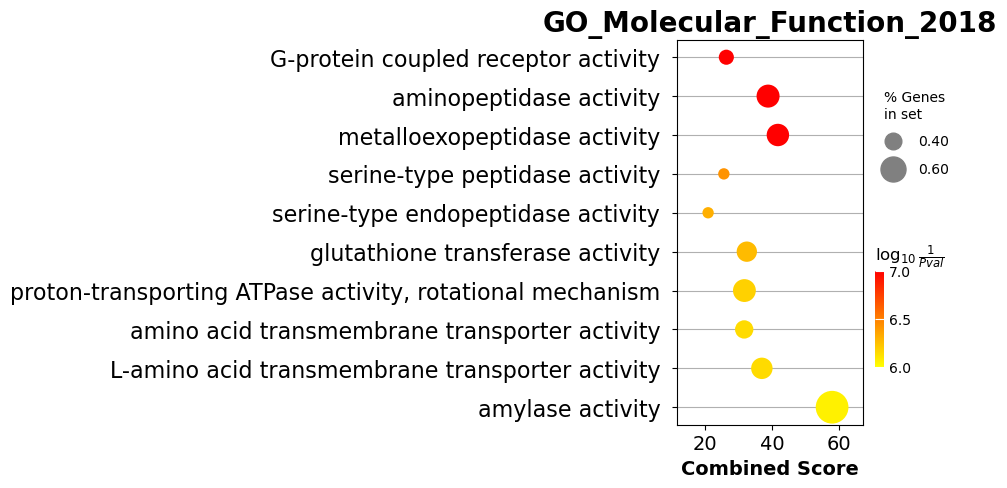

In [13]:
go_analysis(genes_list, 'GO_Molecular_Function_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')

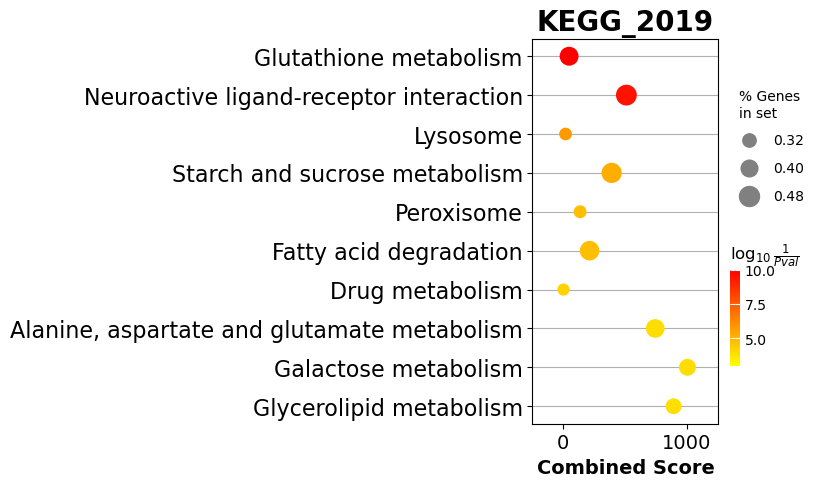

In [14]:
go_analysis(genes_list, 'KEGG_2019', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')